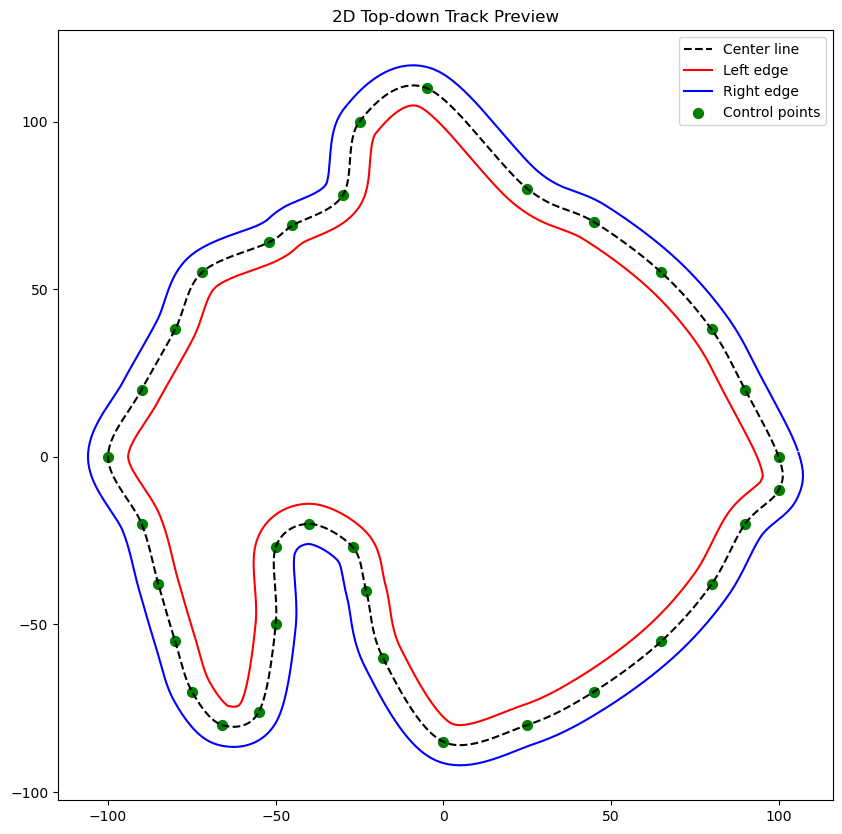

In [9]:
# track_2d.py
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Hàm Catmull-Rom interpolation
# -----------------------------
def catmull_rom(p0, p1, p2, p3, t):
    t2 = t * t
    t3 = t2 * t
    x = 0.5 * ((2*p1[0]) +
               (-p0[0] + p2[0]) * t +
               (2*p0[0] - 5*p1[0] + 4*p2[0] - p3[0]) * t2 +
               (-p0[0] + 3*p1[0] - 3*p2[0] + p3[0]) * t3)
    y = 0.5 * ((2*p1[1]) +
               (-p0[1] + p2[1]) * t +
               (2*p0[1] - 5*p1[1] + 4*p2[1] - p3[1]) * t2 +
               (-p0[1] + 3*p1[1] - 3*p2[1] + p3[1]) * t3)
    return np.array([x, y])

# -----------------------------
# Đọc track points từ file
# -----------------------------
def load_track(filename):
    points = []
    with open(filename, "r") as f:
        for line in f:
            x, y, z = map(float, line.strip().split())
            # Dùng x,z làm tọa độ 2D (trục y = 0)
            points.append([x, z])
    return points

# -----------------------------
# Xây dựng sampled points Catmull-Rom
# -----------------------------
def build_sampled(points, samples_per_segment=20):
    sampled = []
    n = len(points)
    if n < 4:
        return points
    for i in range(n):
        p0 = points[(i - 1) % n]
        p1 = points[i]
        p2 = points[(i + 1) % n]
        p3 = points[(i + 2) % n]
        for s in range(samples_per_segment):
            t = s / samples_per_segment
            sampled.append(catmull_rom(p0, p1, p2, p3, t))
    return np.array(sampled)

# -----------------------------
# Vẽ track 2D
# -----------------------------
def draw_track(points, width=12.0):
    sampled = build_sampled(points)
    
    # Tính left/right boundaries dựa trên hướng tangent
    left = []
    right = []
    for i in range(len(sampled)):
        p = sampled[i]
        p_next = sampled[(i+1) % len(sampled)]
        forward = p_next - p
        # normalize forward
        norm = np.linalg.norm(forward)
        if norm == 0: norm = 1
        forward /= norm
        # normal vector (2D perpendicular)
        normal = np.array([-forward[1], forward[0]])
        left.append(p + normal * (width/2))
        right.append(p - normal * (width/2))
    
    left = np.array(left)
    right = np.array(right)
    
    plt.figure(figsize=(10,10))
    # Vẽ đường trung tâm
    plt.plot(sampled[:,0], sampled[:,1], 'k--', label="Center line")
    # Vẽ rìa trái/phải
    plt.plot(left[:,0], left[:,1], 'r', label="Left edge")
    plt.plot(right[:,0], right[:,1], 'b', label="Right edge")
    plt.scatter(*zip(*points), color='green', s=50, label='Control points')
    
    plt.axis('equal')
    plt.title("2D Top-down Track Preview")
    plt.legend()
    plt.show()

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    track_points = load_track("track_points.txt")
    draw_track(track_points, width=12)
